<a href="https://colab.research.google.com/github/donib-irakihda/fusemachines-ai-fellowship/blob/main/LinearRegression_Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt

Loading Dataset

In [4]:
data_path = "https://www.statlearning.com/s/Advertising.csv" 
data_df = pd.read_csv(data_path, index_col=0)
data_df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


### Data Visualization

---



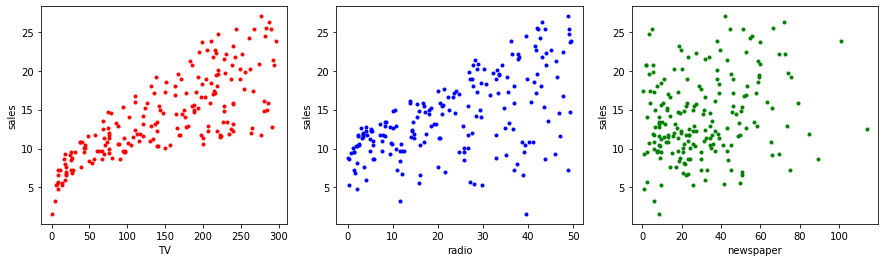

In [5]:
fig = plt.figure(figsize=(15,4))
gs = mpl.gridspec.GridSpec(1,3)

# Plot of sales vs TV
ax = fig.add_subplot(gs[0])
ax.scatter(data_df['TV'], data_df['sales'], color='red', marker='.')
ax.set_xlabel('TV')
ax.set_ylabel('sales')

# Plot of sales vs radio
ax = fig.add_subplot(gs[1])
ax.scatter(data_df['radio'], data_df['sales'], color='blue', marker='.')
ax.set_xlabel('radio')
ax.set_ylabel('sales')

# Plot of sales vs newspaper
ax = fig.add_subplot(gs[2])
ax.scatter(data_df['newspaper'], data_df['sales'], color='green', marker='.')
ax.set_xlabel('newspaper')
ax.set_ylabel('sales')

plt.show()

## Linear Regression
y = mx + c

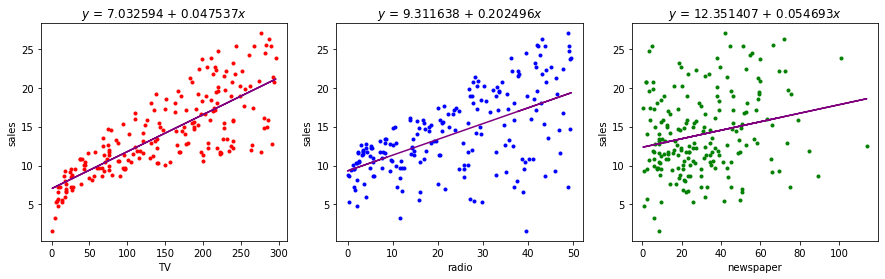

In [6]:
fig = plt.figure(figsize=(15,4))
gs = mpl.gridspec.GridSpec(1,3)

# function for training and plotting
def train_plot(data_df, feature, ax, c):
  X = data_df[[feature]].values
  Y = data_df[["sales"]].values

  x_mean = np.mean(X)
  y_mean = np.mean(Y)

  n = len(X) # no of features
  
  # Using OLS formula to calculate the b1 and b0
  numerator = 0
  denominator = 0
  for i in range (n):
   numerator += (X[i] - x_mean) * (Y[i] - y_mean)
   denominator += (X[i] - x_mean) ** 2

  b1 = numerator/denominator
  b0 = y_mean - (b1 * x_mean)
  y_hat = b0 + np.dot(X, b1)

  # Plot the regression line
  ax.scatter(data_df[feature], data_df["sales"], color=c, marker='.')
  ax.plot(X, y_hat, color='purple')
  ax.set_xlabel(feature)
  ax.set_ylabel('sales')
  ax.set_title(("$y$ = %3f + %3f$x$" %(b0, b1)))

# Train model using TV data to predict
ax0 = fig.add_subplot(gs[0])
train_plot(data_df, "TV", ax0, "red")

# Train model using radio data to predict
ax1 = fig.add_subplot(gs[1])
train_plot(data_df, "radio", ax1, "blue")

# Train model using newspaper data to predict
ax2 = fig.add_subplot(gs[2])
train_plot(data_df, "newspaper", ax2, "green")

plt.show()


## Multiple Linear Regression

$y$ = b0 + b1$x_1$ + b2$x_2$ + b3$x_3$



In [7]:
from IPython.display import HTML, display
# Training Linear Regression using TV and radio feature
X = data_df[['TV', "radio"]]
y = data_df[['sales']]

X = np.c_[np.ones((200,1)), X]
X_transpose = np.transpose(X)

# OLS closed form equation implementation
betas = np.linalg.inv(X_transpose.dot(X)).dot(X_transpose).dot(y)

message = """<strong>TV and Radio</strong> <br>
$y$ = {:.2f} + {:.2f}$x_{{1}}$ + {:.2f}$x_{{2}}$ <br>
$x_{{1}}$ = TV <br>
$x_{{2}}$ = radio
""".format(*betas[0], *betas[1], *betas[2])
display(HTML( message ))

print("")

## Training using all features
X = data_df[["TV", "radio", "newspaper"]]
y = data_df[["sales"]]

X = np.c_[np.ones((200,1)), X]

X_transpose = np.transpose(X)

betas = np.linalg.inv(X_transpose.dot(X)).dot(X_transpose).dot(y)

message = """<strong>TV, Radio, and Newspaper</strong> <br>
$y$ = {:.2f} + {:.2f}$x_{{1}}$ + {:.2f}$x_{{2}}$ + {:.2f}$x_{{3}}$ <br>
$x_{{1}}$ = TV <br>
$x_{{2}}$ = radio <br>
$x_{{3}}$ = newspaper
""".format(*betas[0], *betas[1], *betas[2], *betas[3])
display(HTML( message ))


In [8]:
def gradient_descent(gradient, x_init, alpha=0.01, max_iters=10000, precision=1e-8):
  x = x_init
  iteration = 0

  while abs(gradient(x)) > precision and iteration < max_iters:
    x = x - alpha * gradient(x)
    iteration += 1
  x_opt = x

  return x_opt, iteration

In [9]:
def f(x):
  return x**2 + 3 * x - 5

def gradient_f(x):
  return 2*x + 3

In [10]:
x_init = 2.4
alpha = 0.95

x_optimal, steps = gradient_descent(gradient_f, x_init, alpha)
print("optimal x: ", x_optimal)
print('min f(x): ', f(x_optimal))
print("no of steps: ", steps)

optimal x:  -1.5000000046596569
min f(x):  -7.25
no of steps:  195


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, median_absolute_error, r2_score
from IPython.display import display, HTML

In [19]:
results = {
    "R Squared": list()
}
linear_regression = LinearRegression()
y_true = data_df[["sales"]]

## TV
linear_regression.fit(data_df[["TV"]], data_df[["sales"]])

y_pred = linear_regression.predict( data_df[["TV"]])
results["R Squared"].append(r2_score(y_true, y_pred))

## radio
linear_regression.fit(data_df[["radio"]], data_df[["sales"]])

y_pred = linear_regression.predict( data_df[["radio"]])
results["R Squared"].append(r2_score(y_true, y_pred))

## newspaper
linear_regression.fit(data_df[["newspaper"]], data_df[["sales"]])

y_pred = linear_regression.predict( data_df[["newspaper"]])
results["R Squared"].append(r2_score(y_true, y_pred))

## TV and radio
linear_regression.fit(data_df[["TV", "radio"]], data_df[["sales"]])

y_pred = linear_regression.predict( data_df[["TV", "radio"]])
results["R Squared"].append(r2_score(y_true, y_pred))

## TV, radio and newspaper
linear_regression.fit(data_df[["TV", "radio", "newspaper"]], data_df[["sales"]])

y_pred = linear_regression.predict( data_df[["TV", "radio", "newspaper"]])
results["R Squared"].append(r2_score(y_true, y_pred))

In [20]:
index = ["TV", "radio", "newspaper", "TV + radio", "TV + radio + newspaper"]
r2_df = pd.DataFrame(results, index=index)
display(r2_df)

,R Squared
TV,0.611875
radio,0.332032
newspaper,0.052120
TV + radio,0.897194
TV + radio + newspaper,0.897211


## Implementing adjusted $R^2$

In [21]:
results = {
    "Adjusted R Squared": list()
}

def adjusted_r2(r2, n, d):
  adj_r2 = 1-((1-r2)*(n-1)/(n-d-1))
  results["Adjusted R Squared"].append(adj_r2)

In [22]:
# TV
adjusted_r2(r2_df.iloc[0, :]['TV'], 200, 1)

# radio
adjusted_r2(r2_df.iloc[0, :]["radio"], 200, 1)

adjusted_r2(r2_df.iloc[0, :]["TV + radio + newspaper"], 200, 3)
# newspaper
adjusted_r2(r2_df.iloc[0, :]["newspaper"], 200, 1)

# TV and radio
adjusted_r2(r2_df.iloc[0, :]["TV + radio"], 200, 2)

# TV, radio and newspaper
adjusted_r2(r2_df.iloc[0, :]["TV + radio + newspaper"], 200, 3)

KeyError: ignored

In [24]:
############
# TV
############
adjusted_r2(r2_df.iloc[0, :]['TV'], 200, 1)


############
# radio
############
adjusted_r2(r2_df.iloc[0, :]['radio'], 200, 1)

############
# newspaper
############
adjusted_r2(r2_df.iloc[0, :]['newspaper'], 200, 1)


############
# TV, radio
############
adjusted_r2(r2_df.iloc[0, :]['TV + radio'], 200, 2)


############
# TV, radio, newspaper
############
adjusted_r2(r2_df.iloc[0, :]['TV + radio + newspaper'], 200, 3)

KeyError: ignored

In [23]:

index = ["TV", "radio", "newspaper", "TV + radio", "TV + radio + newspaper"]
adjusstedr2_df = pd.DataFrame(results, index=index).transpose()
display(adjusstedr2_df)

ValueError: ignored